## Ejercicio 1
#### Dataset de educación (matrículas IES)
https://www.datos.gov.co/Educaci-n/Matriculas-Cali/recv-c699


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Matriculas_Cali.csv")
df.head(5)

,Código de la Institución,IES PADRE,Institución de Educación Superior (IES),Principal oSeccional,Id_Sector,Id_Caracter,Código del departamento(IES),Departamento de domicilio de la IES,Código del Municipio(IES),Municipio dedomicilio de la IES,...,Id_Area,Núcleo Básico del Conocimiento (NBC),Código del Departamento(Programa),Departamento de oferta del programa,Código del Municipio(Programa),Municipio de oferta del programa,Id Género,Año,Semestre,Total Matriculados
0,1203,1203,UNIVERSIDAD DEL VALLE,PRINCIPAL,1,4,76,VALLE DEL CAUCA,76001,CALI,...,4,MEDICINA,76,VALLE DEL CAUCA,76001,CALI,2,2015,1,352
1,1203,1203,UNIVERSIDAD DEL VALLE,PRINCIPAL,1,4,76,VALLE DEL CAUCA,76001,CALI,...,4,MEDICINA,76,VALLE DEL CAUCA,76001,CALI,1,2015,1,329
2,1203,1203,UNIVERSIDAD DEL VALLE,PRINCIPAL,1,4,76,VALLE DEL CAUCA,76001,CALI,...,4,ODONTOLOGIA,76,VALLE DEL CAUCA,76001,CALI,2,2015,1,120
3,1203,1203,UNIVERSIDAD DEL VALLE,PRINCIPAL,1,4,76,VALLE DEL CAUCA,76001,CALI,...,4,ODONTOLOGIA,76,VALLE DEL CAUCA,76001,CALI,1,2015,1,74
4,1203,1203,UNIVERSIDAD DEL VALLE,PRINCIPAL,1,4,76,VALLE DEL CAUCA,76001,CALI,...,8,INGENIERIA QUIMICA Y AFINES,76,VALLE DEL CAUCA,76001,CALI,2,2015,1,83


### ¿Cuántos estudiantes ha tenido la universidad Icesi (de acuerdo a este reporte) en total? 

Basado en los datos disponibles, construya una vista simple (consola no gráfica) que permita la visualización

In [12]:
#df["indice_inicial"] = df.index;
# "indice_inicial",
df_filtered = df[[ "Institución de Educación Superior (IES)", "Total Matriculados"]]
df_filtered = df_filtered.groupby("Institución de Educación Superior (IES)").sum().sort_values(by="Total Matriculados", ascending=False)
df_filtered.loc["UNIVERSIDAD ICESI"]

Total Matriculados    44506
Name: UNIVERSIDAD ICESI, dtype: int64

In [16]:
indices = df_filtered.index
indices.get_loc("UNIVERSIDAD ICESI")

5

In [24]:
initial_index = df[ df["Institución de Educación Superior (IES)"]=="UNIVERSIDAD ICESI" ].index
initial_index

Int64Index([ 773,  774,  775,  776,  777,  778,  779,  780,  781,  782,
            ...
            8095, 8096, 8097, 8098, 8099, 8100, 8101, 8102, 8103, 8104],
           dtype='int64', length=818)

### ¿Cómo podemos ver el conjunto de las categorias posibles en la columna "Núcleo Básico del Conocimiento (NBC)"?

Construya el código requerido para visualizar el listado de categorías

In [30]:
df_filtered_b = df[["Núcleo Básico del Conocimiento (NBC)", "Total Matriculados"]]
df_filtered_ordered = df_filtered_b["Núcleo Básico del Conocimiento (NBC)"].sort_values().unique()
pd.DataFrame(df_filtered_ordered, columns=["Categoria"])

,Categoria
0,ADMINISTRACION
1,ADMINISTRACIÓN
2,AGRONOMIA
3,AGRONOMÍA
4,ANTROPOLOGIA ARTES LIBERALES
...,...
148,Salud pública
149,Sin clasificar
150,Sociología trabajo social y afines
151,TERAPIAS


### ¿Cómo podemos ver el total de matriculados por año agrupados por universidad?

Construya el código requerido para visualizar el listado de categorías

In [33]:
df_filtered_anio = df[[ "Año", "Institución de Educación Superior (IES)", "Total Matriculados"]]
df_filtered_anio = df_filtered_anio.groupby([ "Institución de Educación Superior (IES)", "Año"]).agg({"Total Matriculados":"sum"})
df_filtered_anio

Total Matriculados
Institución de Educación Superior (IES)       Año                     
CORPORACION DE ESTUDIOS SUPERIORES SALAMANDRA 2015                  33
                                              2016                  51
                                              2017                  83
                                              2018                 155
                                              2019                 248
...                                                                ...
UNIVERSIDAD SANTIAGO DE CALI                  2016               14275
                                              2017               16144
                                              2018               14898
                                              2019               17237
                                              2020               17658

[135 rows x 1 columns]

### ¿Cómo podemos ver el total de matriculados por año en la universidad icesi?

Construya el código requerido para visualizar el listado de categorías

In [47]:
df_filtered_anio_icesi = df[[ "Año", "Institución de Educación Superior (IES)", "Total Matriculados"]]
df_filtered_anio_icesi = df_filtered_anio_icesi.groupby([ "Institución de Educación Superior (IES)", "Año"]).agg({"Total Matriculados":"sum"}).reset_index()
df_filtered_anio_icesi.loc[df_filtered_anio_icesi["Institución de Educación Superior (IES)"] == "UNIVERSIDAD ICESI"]

,Institución de Educación Superior (IES),Año,Total Matriculados
117,UNIVERSIDAD ICESI,2015,6438
118,UNIVERSIDAD ICESI,2016,7197
119,UNIVERSIDAD ICESI,2017,7496
120,UNIVERSIDAD ICESI,2018,8011
121,UNIVERSIDAD ICESI,2019,7694
122,UNIVERSIDAD ICESI,2020,7670


### ¿Cómo podemos visualizar esto para las 10 universidades con mayor cantidad de matriculados"?

Construya el código requerido para visualizar el listado de categorías

In [48]:
df_global_mat = df[["Institución de Educación Superior (IES)", "Total Matriculados"]]
df_global_mat = df_global_mat.groupby(["Institución de Educación Superior (IES)"]).agg({"Total Matriculados":"sum"}).reset_index()
df_global_mat.sort_values(by="Total Matriculados", ascending=False).head(10)

,Institución de Educación Superior (IES),Total Matriculados
23,UNIVERSIDAD DEL VALLE,164878
26,UNIVERSIDAD SANTIAGO DE CALI,93637
21,UNIVERSIDAD AUTONOMA DE OCCIDENTE,63605
19,PONTIFICIA UNIVERSIDAD JAVERIANA,49495
15,INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO,44823
24,UNIVERSIDAD ICESI,44506
25,UNIVERSIDAD LIBRE,42069
22,UNIVERSIDAD DE SAN BUENAVENTURA,30309
10,FUNDACION CENTRO COLOMBIANO DE ESTUDIOS PROFES...,24908
12,FUNDACION UNIVERSITARIA CATOLICA LUMEN GENTIUM,19658


#### ¿Alguna forma más sencilla y performante?

In [49]:
df_global_mat = df_global_mat.nlargest(7, "Total Matriculados")
df_global_mat

,Institución de Educación Superior (IES),Total Matriculados
23,UNIVERSIDAD DEL VALLE,164878
26,UNIVERSIDAD SANTIAGO DE CALI,93637
21,UNIVERSIDAD AUTONOMA DE OCCIDENTE,63605
19,PONTIFICIA UNIVERSIDAD JAVERIANA,49495
15,INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO,44823
24,UNIVERSIDAD ICESI,44506
25,UNIVERSIDAD LIBRE,42069


#### Visualización sencilla

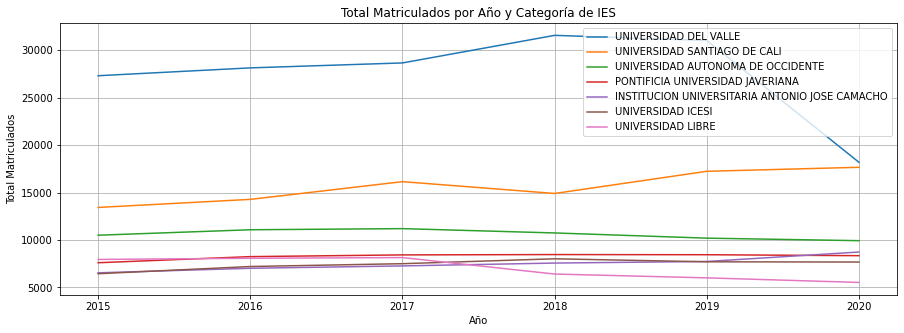

In [50]:
df_filtered_anio = df[["Año", "Institución de Educación Superior (IES)", "Total Matriculados"]]
datos_agrupados = df_filtered_anio.groupby(["Institución de Educación Superior (IES)", "Año"]).agg({"Total Matriculados": "sum"}).reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
for categoria in df_global_mat["Institución de Educación Superior (IES)"].unique():
    datos_categoria = datos_agrupados[datos_agrupados["Institución de Educación Superior (IES)"] == categoria]
    ax.plot(datos_categoria["Año"], datos_categoria["Total Matriculados"], label=categoria)
ax.set_xlabel("Año")
ax.set_ylabel("Total Matriculados")
ax.set_title("Total Matriculados por Año y Categoría de IES")
ax.legend()
ax.grid(True)  # Agregar la retícula
plt.show()

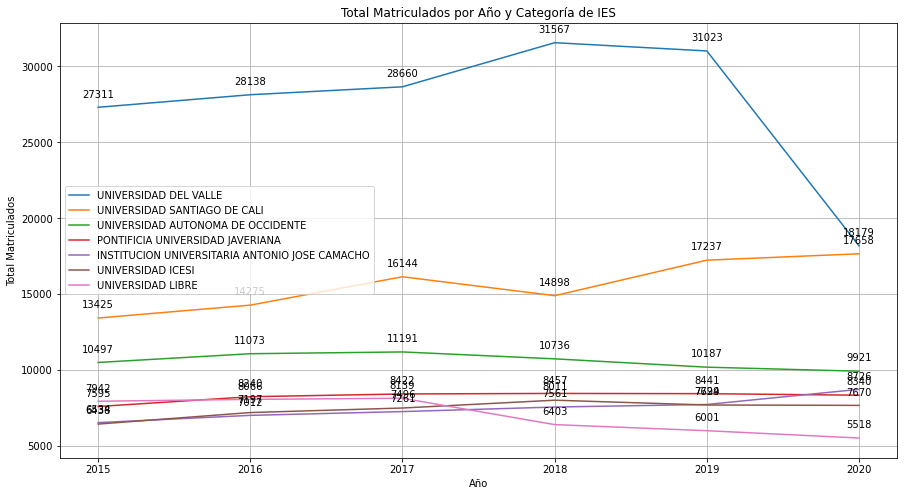

In [51]:
fig, ax = plt.subplots(figsize=(15, 8))
for categoria in df_global_mat["Institución de Educación Superior (IES)"].unique():
    datos_categoria = datos_agrupados[datos_agrupados["Institución de Educación Superior (IES)"] == categoria]
    ax.plot(datos_categoria["Año"], datos_categoria["Total Matriculados"], label=categoria)
    for i, matriculados in enumerate(datos_categoria["Total Matriculados"]):
        ax.annotate(matriculados, (datos_categoria["Año"].values[i], matriculados),
                    textcoords="offset points", xytext=(0,10), ha='center')
ax.set_xlabel("Año")
ax.set_ylabel("Total Matriculados")
ax.set_title("Total Matriculados por Año y Categoría de IES")
ax.legend()
ax.grid(True)  # Agregar la retícula
plt.show()
